# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import balanced_accuracy_1interval_score

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the tuning of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/additional.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [make_scorer(balanced_accuracy_1interval_score)]

X = pd.read_csv("../assets/data/processed/additional_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.4418703939158484
              precision    recall  f1-score   support

           1       0.57      0.89      0.69       252
           2       0.58      0.90      0.70       252
           3       0.50      0.75      0.60       252
           4       0.54      0.48      0.51       252
           5       0.51      0.38      0.44       252
           6       0.40      0.47      0.43       252
           7       0.38      0.49      0.43       252
           8       0.38      0.41      0.40       252
           9       0.40      0.37      0.39       252
          10       0.40      0.44      0.42       252
          11       0.40      0.29      0.34       252
          12       0.43      0.37      0.40       252
          13       0.34      0.46      0.39       252
          14       0.43      0.40      0.41       252
          15       0.43      0.42      0.42       252
  

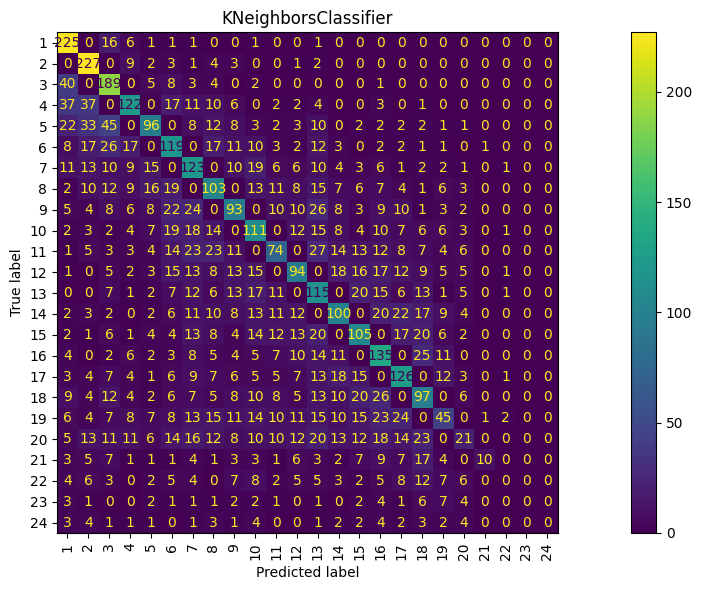

In [3]:
X_selected = X[
    [
        "positionGrid",
        "constructorRef",
        "driverWins",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
    ]
]
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X_selected, y, tscv, scorers=scorers, interval=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.37852122624849893
              precision    recall  f1-score   support

           1       0.47      0.89      0.62       252
           2       0.63      0.84      0.72       252
           3       0.49      0.54      0.51       252
           4       0.50      0.42      0.46       252
           5       0.44      0.35      0.39       252
           6       0.32      0.44      0.37       252
           7       0.32      0.39      0.35       252
           8       0.34      0.35      0.34       252
           9       0.31      0.29      0.30       252
          10       0.26      0.29      0.27       252
          11       0.33      0.33      0.33       252
          12       0.33      0.36      0.34       252
          13       0.31      0.43      0.36       252
          14       0.32      0.31      0.32       252
          15       0.41      0.32      0.36       252
 

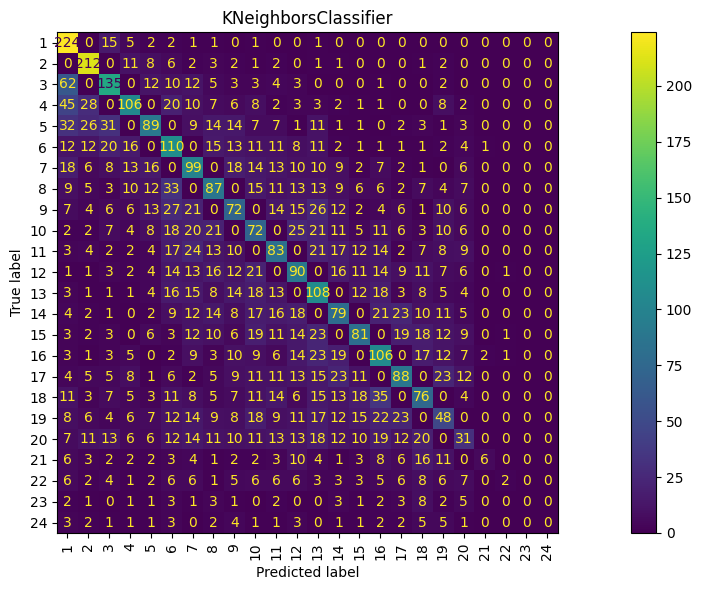

In [4]:
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X, y, tscv, scorers=scorers, interval=1)

## Decision Tree


DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.35845161992889274
              precision    recall  f1-score   support

           1       0.70      0.82      0.75       252
           2       0.67      0.74      0.70       252
           3       0.49      0.67      0.57       252
           4       0.45      0.64      0.53       252
           5       0.37      0.47      0.41       252
           6       0.35      0.45      0.40       252
           7       0.23      0.44      0.30       252
           8       0.41      0.31      0.35       252
           9       0.17      0.18      0.18       252
          10       0.41      0.25      0.31       252
          11       0.17      0.20      0.18       252
          12       0.28      0.30      0.29       252
          13       0.26      0.23      0.24       252
          14       0.35      0.32      0.33       252
          15       0.24      0.30      0.27       252
          16       0.4

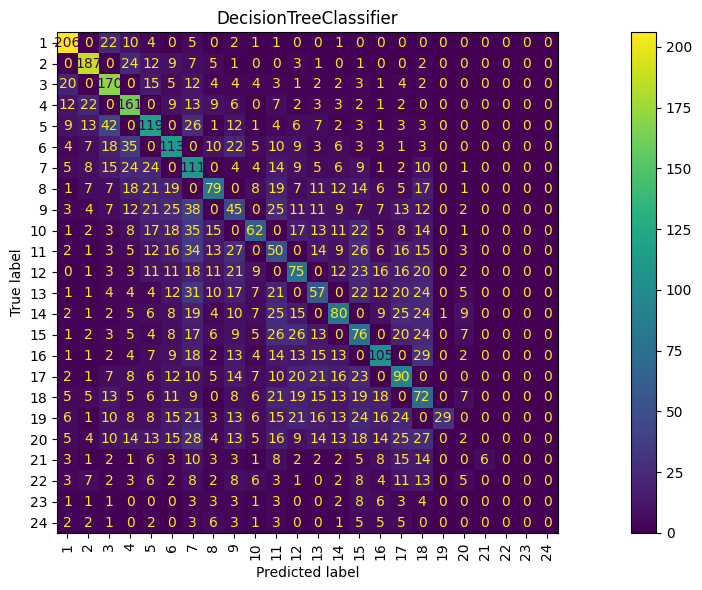

In [5]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitLocation",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "q1",
        "q2",
        "q3",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, interval=1)

DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3544364684137412
              precision    recall  f1-score   support

           1       0.70      0.82      0.75       252
           2       0.67      0.73      0.70       252
           3       0.48      0.64      0.55       252
           4       0.44      0.62      0.52       252
           5       0.40      0.46      0.43       252
           6       0.34      0.43      0.38       252
           7       0.24      0.42      0.30       252
           8       0.43      0.31      0.36       252
           9       0.16      0.15      0.15       252
          10       0.41      0.24      0.30       252
          11       0.14      0.20      0.17       252
          12       0.30      0.30      0.30       252
          13       0.23      0.24      0.23       252
          14       0.35      0.33      0.34       252
          15       0.24      0.31      0.27       252
          16       0.43

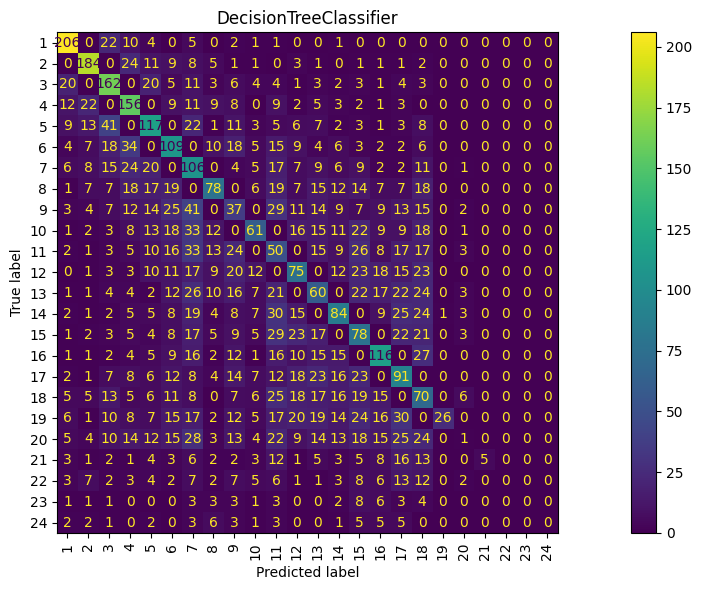

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, interval=1)

## Random Forest


RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.4686283728897366
              precision    recall  f1-score   support

           1       0.58      0.92      0.71       252
           2       0.59      0.94      0.72       252
           3       0.49      0.79      0.60       252
           4       0.51      0.65      0.57       252
           5       0.46      0.46      0.46       252
           6       0.42      0.46      0.44       252
           7       0.39      0.48      0.43       252
           8       0.44      0.37      0.40       252
           9       0.42      0.35      0.38       252
          10       0.38      0.42      0.40       252
          11       0.53      0.33      0.41       252
          12       0.36      0.40      0.38       252
          13       0.44      0.50      0.47       252
          14       0.36      0.38      0.37       252
          15       0.39      0.43      0.41       252
     

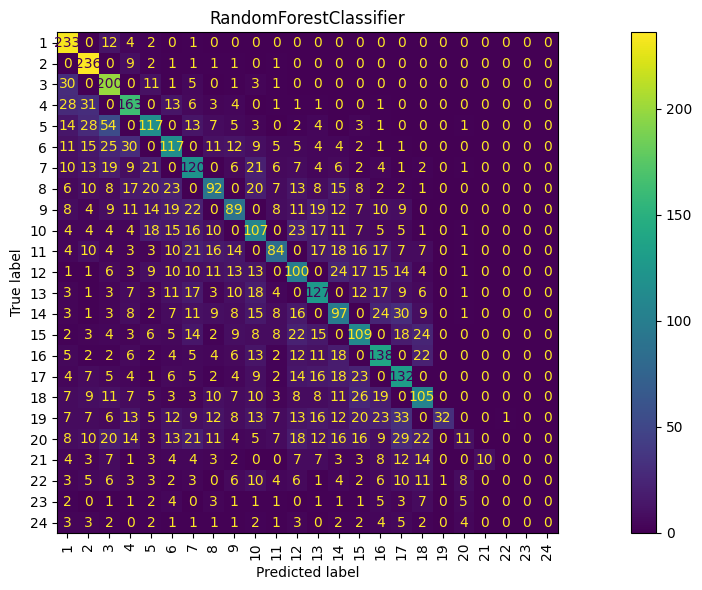

In [7]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "driverNationality",
        "constructorNationality",
        "grandPrix",
        "circuitRef",
        "driverWins",
        "constructorWins",
        "q1",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
    ]
]
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, interval=1)

RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.45929266440630084
              precision    recall  f1-score   support

           1       0.60      0.92      0.72       252
           2       0.58      0.91      0.71       252
           3       0.49      0.76      0.60       252
           4       0.49      0.63      0.55       252
           5       0.45      0.53      0.48       252
           6       0.44      0.42      0.43       252
           7       0.37      0.40      0.39       252
           8       0.43      0.38      0.41       252
           9       0.35      0.38      0.37       252
          10       0.41      0.42      0.41       252
          11       0.47      0.34      0.39       252
          12       0.33      0.44      0.38       252
          13       0.42      0.47      0.44       252
          14       0.39      0.38      0.39       252
          15       0.43      0.42      0.43       252
    

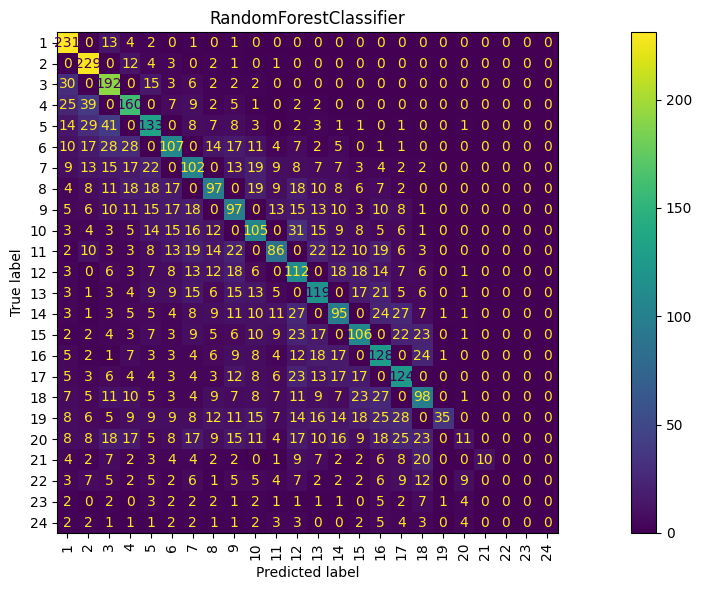

In [8]:
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X, y, tscv, scorers=scorers, interval=1)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.42082718207718206
              precision    recall  f1-score   support

           1       0.61      0.91      0.73       252
           2       0.72      0.75      0.74       252
           3       0.59      0.57      0.58       252
           4       0.55      0.59      0.57       252
           5       0.40      0.63      0.49       252
           6       0.36      0.56      0.44       252
           7       0.44      0.42      0.43       252
           8       0.31      0.31      0.31       252
           9       0.49      0.35      0.41       252
          10       0.27      0.40      0.33       252
          11       0.32      0.43      0.37       252
          12       0.37      0.45      0.41       252
          13       0.32      0.44      0.37       252
          14       0.40      0.38      0.39       252
          15       0.32      0.25      0.2

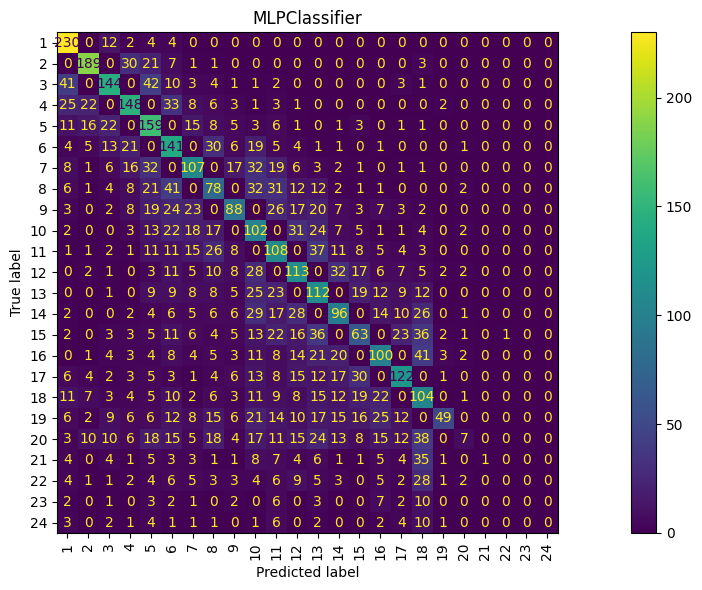

In [9]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "circuitRef",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "driverAgeToday",
        "driverAgeAtRace",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X_selected, y, tscv, scorers=scorers, interval=1)

MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.4173233941983942
              precision    recall  f1-score   support

           1       0.58      0.88      0.70       252
           2       0.72      0.78      0.75       252
           3       0.54      0.50      0.52       252
           4       0.55      0.54      0.55       252
           5       0.39      0.58      0.47       252
           6       0.39      0.57      0.46       252
           7       0.38      0.40      0.39       252
           8       0.30      0.31      0.30       252
           9       0.52      0.33      0.40       252
          10       0.29      0.40      0.33       252
          11       0.31      0.49      0.38       252
          12       0.35      0.47      0.40       252
          13       0.39      0.43      0.41       252
          14       0.31      0.33      0.32       252
          15       0.38      0.28      0.32

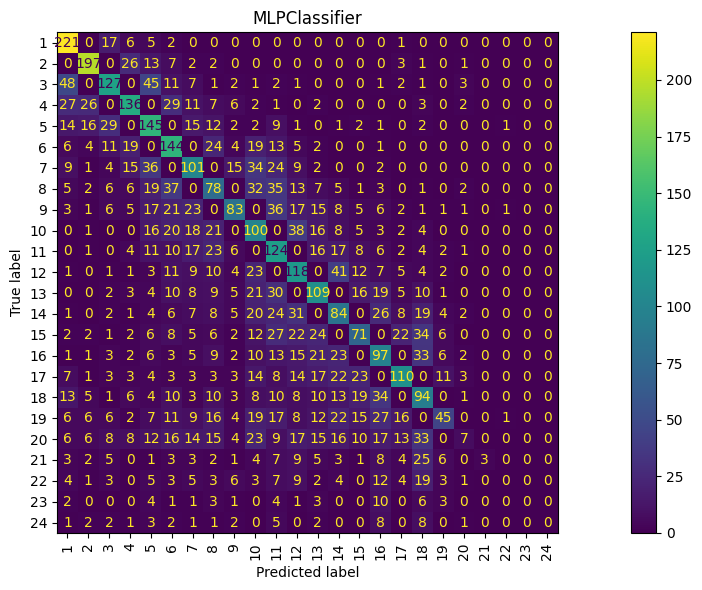

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X, y, tscv, scorers=scorers, interval=1)

## Results


Based on the model in the previous section, i.e. with optimised attributes, performance has improved.

With all attributes, we have improved the performance of the model. Note that we have greatly increased the number of attributes, so here it would be convenient to redo selection and tuning.
